## 1. Re-code the house price machine learning

In [15]:
from sklearn.datasets import load_boston
import random

In [17]:
import matplotlib.pyplot as plt

In [18]:
datasets = load_boston()

In [19]:
#datasets

In [20]:
datasets.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
datasets.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [22]:
x,y = datasets['data'],datasets['target']

In [23]:
x.shape

(506, 13)

In [24]:
y.shape

(506,)

In [13]:
x_dis = x[:,7]

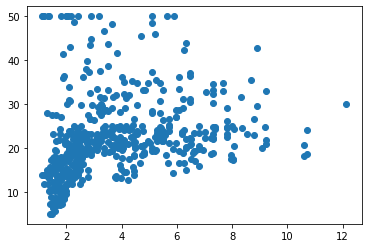

In [25]:
plt.scatter(x_dis,y)

In [28]:
def price(dis,k,b):
    return k * dis + b

### $$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

### $$ loss = \frac{1}{n} \sum{|y_i - kx_i-b|}$$

### $$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum(x)$$

### $$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum(i)$$

In [33]:
def loss(y,y_hat):
    return sum((abs(y_i-y_hat_i)) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [35]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient